# Linear Regression




Some real-life examples of linear regression :

(1) To predict sales of products.
(2) To predict economic growth.
(3) To predict petroleum prices.
(4) To predict the emission of a new car.
(5) Impact of GPA on college admissions.


There are two types of linear regression :
Simple Linear Regression
Multivariable Linear Regression



# simple linear regression

Simple Linear Regression:


In simple linear regression, we predict the output/dependent variable based on only one input feature. The simple linear regression is given by:
Linear regression equation.




y=b0 + b1 * X1

b0 = Constant or y intercept of line
b1 = Cooefficent of input feature
X1 = Input feature on which output is based
Y  = Output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
#Download the vehicle model dataset
# https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


data=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


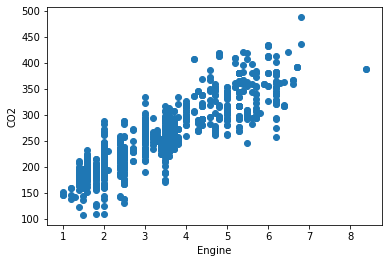

In [7]:
# Let’s select some features to explore more :
data = data[['ENGINESIZE','CO2EMISSIONS']]


# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data['ENGINESIZE'],data['CO2EMISSIONS'])
plt.xlabel('Engine')
plt.ylabel('CO2')
plt.show()

In [9]:
print(len(data))
int((len(data)*0.8))


1067


853

In [11]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]


# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)


# The coefficients:
print ('coefficients : ',regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


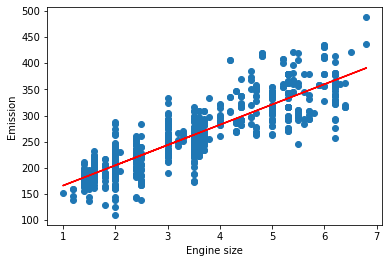

In [13]:
# Plotting the regression line:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'])
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

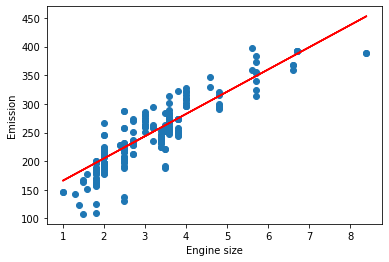

In [14]:
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])


# Plotting the regression line:
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'])
plt.plot(test_x, regr.coef_*test_x + regr.intercept_, '-r')
plt.plot(test_x, regr.coef_*test_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()



In [15]:
#Predicting 

# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values
# Predicting emission for future car:



my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)

Estimated Emission : 262.9528329350173


In [39]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_y = regr.predict(test_x)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y,test_y)))
print('Mean sum of squares (MSE): %.2f' % np.mean((test_y-test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y) )

Mean absolute error: 241.08
Mean sum of squares (MSE): 0.00
R2-score: 0.78


# Multivariable linear regression


In simple linear regression, we were only able to consider one input feature for predicting the value of the output feature. However, in Multivariable Linear Regression, we can predict the output based on more than one input feature. Here is the formula for multivariable linear regression.

y=B0 + B1*X1 + B2*X2 ...... + Bn*Xn
B0 = Constant or y intercept of line
B1,B2,Bn = Cooefficent of input feature
X1,X2,Xn = Input feature on which output is based
Y  = Output

In [25]:
#Download the vehicle model dataset
# https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


data=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [26]:
train=data[:int(len(data)*0.8)]
print(train.head())

test=data[int(len(data)*0.8):]
print(test.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [27]:
train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [30]:
X_train=train[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]


y_train=train[['CO2EMISSIONS']]

X_test=test[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]


y_test=test[['CO2EMISSIONS']]

In [31]:

# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(X_train)
train_y = np.array(y_train)
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
test_x = np.array(X_test)
test_y = np.array(y_test)

predict=regr.predict(test_x)

In [46]:
# Check accuracy:
from sklearn.metrics import r2_score
R = r2_score(test_y , predict)
print ('R² :',R)

R² : 0.9362912548588906
